In [ ]:
import warnings
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.width',       None)
pd.set_option('display.max_columns', None)

# Load

In [ ]:
Raw = pd.read_csv('Storage/Metatrader_WINN.csv', parse_dates=['datetime'])
Raw.head()

In [ ]:
def QUERY_SELECT(Raw, SYMBOLS, TFRAMES):
    return Raw[Raw['symbol'].isin(SYMBOLS) & Raw['tf'].isin(TFRAMES)] .reset_index(drop=1)

Query = QUERY_SELECT(Raw, SYMBOLS=['WIN$N'], TFRAMES=['M5'])
Query.head()

# Data

In [ ]:
def FORMAT_SOURCE(Query):
    Src = pd.DataFrame()
    Src[['A','Z']]                      = Query[['a','z']]
    Src[['Symbol','TF']]                = Query[['symbol','tf']]

    Src['Datetime']                     = Query['datetime']
    Src['Date']                         = Query['datetime'].dt.date
    Src['Time']                         = Query['datetime'].dt.time

    Src[['Ticks','Volume']]             = Query[['tick_volume','real_volume']]
    Src[['Open','High','Low','Close']]  = Query[['open','high','low','close']]
    Src[['Price']]                      = Query[['close']]
    return Src 

Src = FORMAT_SOURCE(Query)
Src.head()

In [ ]:
def CALCULATIONS(Src):
    Calc = pd.DataFrame(Src)
    Calc_by = Calc.groupby(['Symbol','TF','Date'], sort=0, group_keys=0)
    
    Calc['ID Time']      = Calc_by['Time']  .rank(method='dense', ascending=1)    .astype(int)
    Calc['ID High Rank'] = Calc_by['Close'] .rank(method='dense', ascending=1)    .astype(int)
    Calc['ID Low Rank']  = Calc_by['Close'] .rank(method='dense', ascending=0)    .astype(int)
    return Calc

Calc = CALCULATIONS(Src)
Calc.head()

# Charts

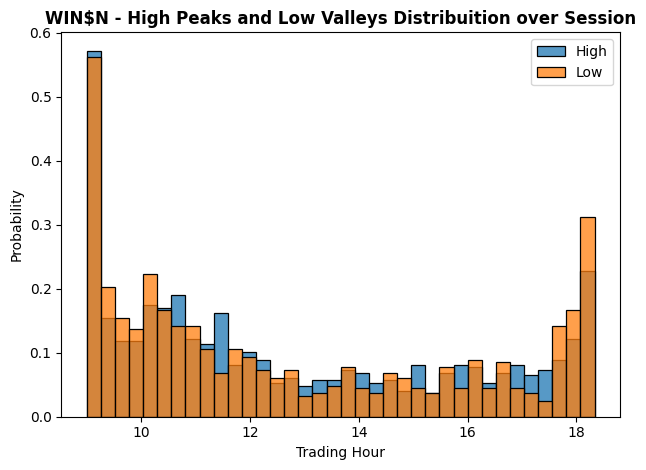

In [13]:
for SYMBOL, Asset in Calc.groupby('Symbol', sort=0):

    plt.title(f'{SYMBOL} - High Peaks and Low Valleys Distribuition over Session', fontweight='bold')

    H = Asset[Asset['ID High Rank']==1]    .reset_index(drop=1)
    L = Asset[Asset['ID Low Rank']==1]     .reset_index(drop=1)

    # sns.kdeplot(H['Time'].apply(lambda x: x.hour + x.minute/60), label='High')
    # sns.kdeplot(L['Time'].apply(lambda x: x.hour + x.minute/60), label='Low')
    sns.histplot(H['Time'].apply(lambda x: x.hour + x.minute/60), label='High', stat='density', bins=36)
    sns.histplot(L['Time'].apply(lambda x: x.hour + x.minute/60), label='Low',  stat='density', bins=36)

    plt.ylabel('Probability')
    plt.xlabel('Trading Hour')
    plt.legend()
    plt.tight_layout()
    plt.show()

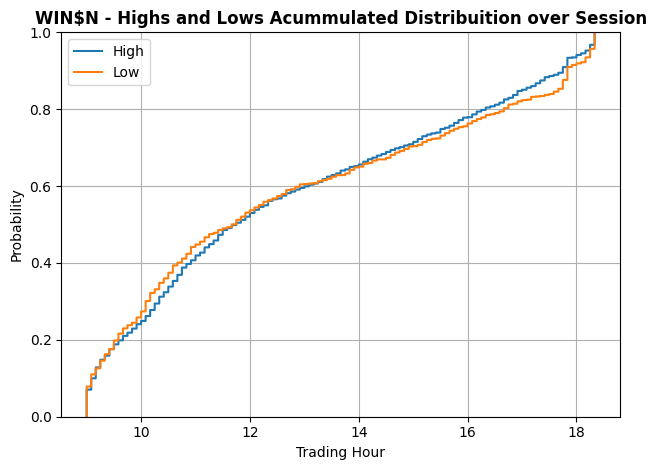

In [14]:
for SYMBOL, Asset in Calc.groupby('Symbol', sort=0):

    plt.title(f'{SYMBOL} - Highs and Lows Acummulated Distribuition over Session', fontweight='bold')

    H = Asset[Asset['ID High Rank']==1]    .reset_index(drop=1)
    L = Asset[Asset['ID Low Rank']==1]     .reset_index(drop=1)

    sns.ecdfplot(H['Time'].apply(lambda x: x.hour + x.minute/60), label='High')
    sns.ecdfplot(L['Time'].apply(lambda x: x.hour + x.minute/60), label='Low')

    plt.ylabel('Probability')
    plt.xlabel('Trading Hour')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Snippets

In [ ]:
def CALCULATIONS(Src):
    Calc = pd.DataFrame(Src)
    Calc_by = Calc.groupby(['Symbol','TF','Date'], sort=0, group_keys=0)

    Calc['ID Time']      = Calc_by['Time'] .rank(method='dense', ascending=1)    .astype(int)
    Calc['ID High Rank'] = Calc_by['High'] .rank(method='dense', ascending=1)    .astype(int)
    Calc['ID Low Rank']  = Calc_by['Low']  .rank(method='dense', ascending=0)    .astype(int)
    return Calc

In [ ]:
for SYMBOL, Asset in Calc.groupby('Symbol', sort=0):

    plt.title(f'{SYMBOL} - High Peaks and Low Valleys Distribuition over Session', fontweight='bold')

    H = Asset[Asset['ID High Rank']==1]    .reset_index(drop=1)
    L = Asset[Asset['ID Low Rank']==1]     .reset_index(drop=1)

    sns.kdeplot(H['Time'].apply(lambda x: x.hour + x.minute/60), label='High')
    sns.kdeplot(L['Time'].apply(lambda x: x.hour + x.minute/60), label='Low')

    plt.ylabel('Probability')
    plt.xlabel('Trading Hour')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
for SYMBOL, Asset in Calc.groupby('Symbol', sort=0):

    plt.title(f'{SYMBOL} - Highs and Lows Acummulated Distribuition over Session', fontweight='bold')

    H = Asset[Asset['ID High Rank']==1]    .reset_index(drop=1)
    L = Asset[Asset['ID Low Rank']==1]     .reset_index(drop=1)

    sns.ecdfplot(H['Time'].apply(lambda x: x.hour + x.minute/60), label='High')
    sns.ecdfplot(L['Time'].apply(lambda x: x.hour + x.minute/60), label='Low')

    plt.ylabel('Probability')
    plt.xlabel('Trading Hour')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()